# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

In [1218]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from scipy import *
import warnings
warnings.filterwarnings("ignore")


**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1219]:
df = pd.read_csv('Advertising.csv')
print(df.info())
print(df.head(3))
df = df.drop('Unnamed: 0', axis=1)
#df['Unnamed: 0'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [1220]:
print(df.isnull().sum())
print(df.duplicated().sum())


TV           0
radio        0
newspaper    0
sales        0
dtype: int64
0


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [1221]:
y = df.iloc[:, -1]
X = df.iloc[:,0:-2]
X = np.array(X)
y = np.array(y)
X.shape


(200, 2)

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [1222]:
X1 = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X1.shape, y.shape)


(200, 3) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [1223]:
X_norm = X1 / np.sqrt(np.sum(np.square(X1), axis=0))


**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [1224]:
num_iters = 1000#количество итераций
m = X_norm.shape[0]# количество строк в матрице X
n = X_norm.shape[1]# количество столбцов в матрице X
w = np.zeros((n, 1))#.reshape(-1,1)#вектор размера nx1, состояющий из нулей
costs= np.zeros((num_iters, n))
w_list = np.zeros((num_iters, n))

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X_norm[:,0:k] @ w[0:k]) + (X_norm[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X_norm[:,k].T @ (y - h))
        w_list[i][k] = w[k]
        # Вычисляем функцию потерь
        #costs[i][k] = sum(((X @ w) - y) ** 2)/(len(y))
weights = w_list[-1]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [1225]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)
 
print(model.coef_)


[[ 41.31059113 110.10778506  73.31964276]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [1226]:
X = (X - X.mean(axis=0)) / X.std(axis=0)
#for i  in range(X.shape[1]):
#    X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])


**Добавим единичный столбец**

In [1227]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])


**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [1228]:
def mse_er(target, y_pred):
    er = np.square(np.subtract(target,y_pred)).mean()
    return er


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [1229]:
y_pred = np.mean(y)
mse_er(y, y_pred)


27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [1230]:
def lin_pred(matrix, w):
    y_pred = matrix@w
    return y_pred


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [1231]:
def stach_grad_step(matrix, target, w, train_ind, eta):
    y_pred = lin_pred(matrix[train_ind], w)
    step = 2*matrix[train_ind]*(y_pred-target[train_ind])/matrix.shape[0]
    w_new = w-eta*step
    return w_new



**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [1232]:
def stochastic_gradient_descent(matrix, target, w, eta, iter_max, eps):
    np.random.seed(0)
    dist = np.inf
    mse_er_list = []
    counter= 0
    while dist>eps and counter<iter_max:
        i = np.random.randint(matrix.shape[0])
        y_pred = lin_pred(X, w)
        mse_er_it = mse_er(target, y_pred)
        mse_er_list.append(mse_er_it)

        w_new = stach_grad_step(matrix, target, w, i, eta)
        dist = np.linalg.norm(np.array(w)-np.array(w_new))
        counter +=1
        w = w_new
    return w_new, mse_er_list, counter

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

Utilized iteration number:  56649


<AxesSubplot: >

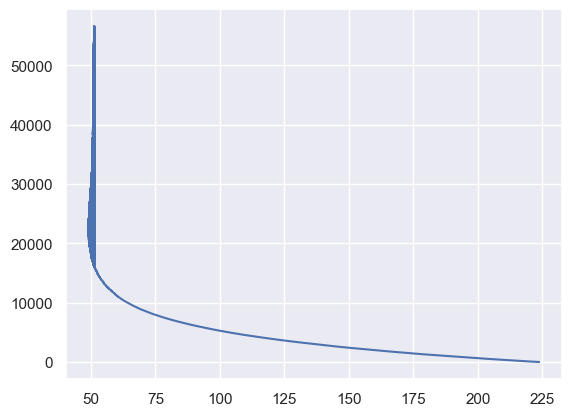

In [1233]:
import seaborn as sns
sns.set_theme(style="darkgrid")

w0 = np.zeros(X.shape[1])#.reshape(-1,1)
vector, error, number = stochastic_gradient_descent(X, y, w=w0, eta=0.01, iter_max=10**5, eps=0.00000001)

print('Utilized iteration number: ', number)

sns.lineplot(x=error, y=range(number))

**Выведите вектор весов, к которому сошелся метод.**

In [1234]:
print('Weights: ', vector)


Weights:  [13.96881937  3.912408    2.77288204]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [1235]:
print('MSE: ', error[-1])


MSE:  51.27363604644302
